In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

In [2]:
# Get the IRIS dataset

from sklearn.datasets import load_iris

iris = load_iris()

In [42]:
# Some data stats...

pd.DataFrame(iris.data, columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [18]:
# Clustering algorithm

from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)
cluster.fit(X_train[:, :2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'sepal width (cm)')

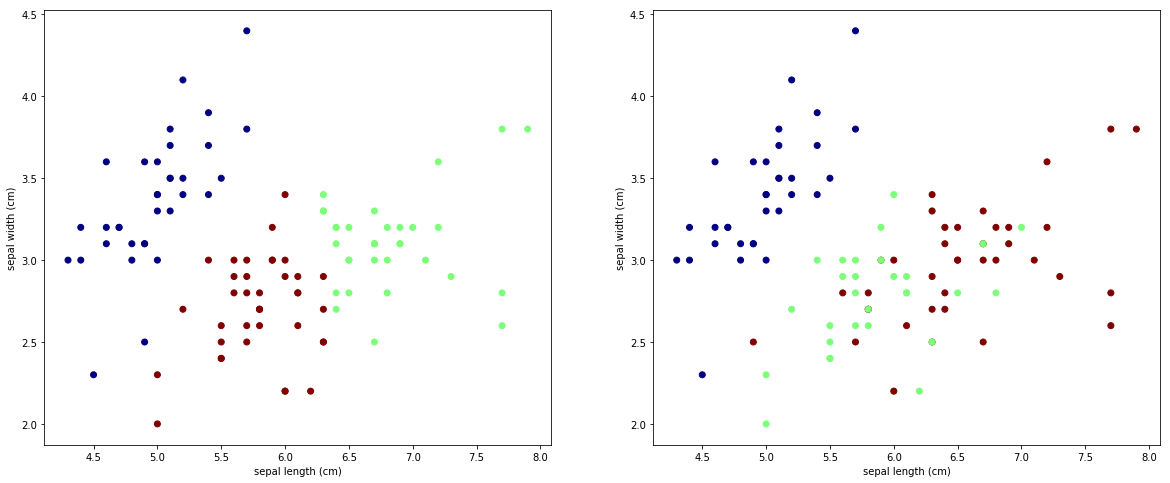

In [40]:
#  Plot identified labels against ground-truth samples

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

axs[0].scatter(X_train[:, 0], X_train[:, 1], c=cluster.labels_, cmap='jet')
axs[0].set_xlabel(iris.feature_names[0])
axs[0].set_ylabel(iris.feature_names[1])

axs[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='jet')
axs[1].set_xlabel(iris.feature_names[0])
axs[1].set_ylabel(iris.feature_names[1])

Text(0.5, 0.92, '3 clusters')

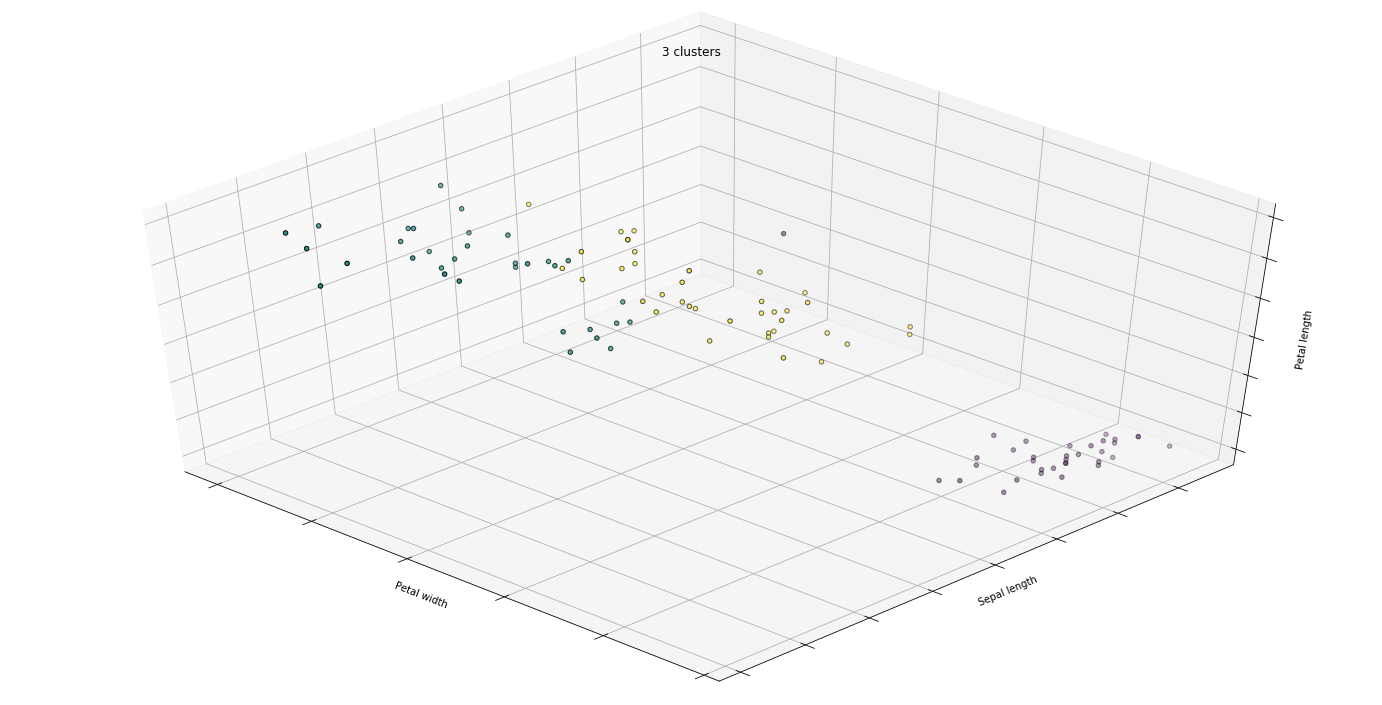

In [36]:
# Plot the kmeans results - 3D

from mpl_toolkits.mplot3d import Axes3D

labels = cluster.labels_

fig = plt.figure(figsize=(20, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1.2], elev=48, azim=134)
ax.scatter(X_train[:, 3], X_train[:, 0], X_train[:, 2], c=labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('3 clusters')